In [ ]:
# This work relies on the the fantatic fastai v2 library (https://github.com/fastai/fastai) 
# Before runing this notebook, please install fastai v2 library
# Alternatively, run 'coda env create -f environment_classification.yml' in the terminal or Anaconda Prompt
# Then, Activate the new environment

In [1]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *

In [3]:
path = Path('./data/content_design_element_analysis/')

In [4]:
path_img = Path('./images/')

In [5]:
path.ls()

(#8) [Path('images'),Path('.ipynb_checkpoints'),Path('Artifact_Classification_Panel.ipynb'),Path('Artifact_Signaling_Classification.ipynb'),Path('predictedResult'),Path('df_cat'),Path('Artifact_Classification_BG.ipynb'),Path('Artifact_Classification_BG-fastai2.ipynb')]

In [6]:
fnames = get_image_files(path/'images')

In [7]:
batch_tfms = [*aug_transforms(size=400, max_warp=0), Normalize.from_stats(*imagenet_stats)]
item_tfms = RandomResizedCrop(460, min_scale=1.)
bs=16

In [8]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [9]:
df_cat = pd.read_csv('./df_cat/signaling.csv')

In [10]:
df_cat.head()

,artifact_id,signaling
0,9c9c6e92-f996-4edd-ba60-9e975ec7d6d6.png,False
1,e5f88f07-6aa0-41e6-a1c9-7c7f55703fd7.png,True
2,5dcd4bee-9e84-4adc-bb21-4a46112ce9bd.png,False
3,a54f3c10-f6dd-4fb2-a8de-5385c7f059c6.png,False
4,3c61f4b3-8d40-47bb-9e66-5125420c7532.png,False


In [11]:
# We use 80 samples for demonstration
df_cat.shape

(80, 2)

In [12]:
df_cat['signaling'].value_counts()

False    41
True     39
Name: signaling, dtype: int64

In [13]:
dls = ImageDataLoaders.from_df(df_cat,path_img,batch_tfms=batch_tfms, 
                         item_tfms=item_tfms, bs=bs)

In [14]:
dls = ImageDataLoaders.from_df(df_cat,path_img, item_tfms=Resize(224,method='squish'), bs=16)

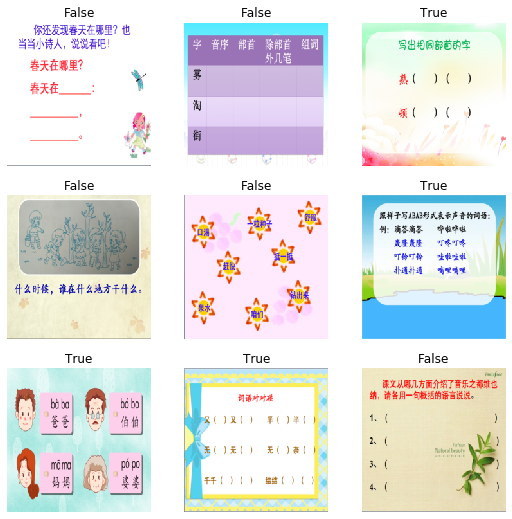

In [15]:
dls.show_batch()

In [16]:
dls.vocab

(#2) [False,True]

# Train

In [17]:
learn = cnn_learner(dls, resnet50, pretrained=True, metrics=error_rate).to_fp16()

SuggestedLRs(lr_min=0.002754228748381138, lr_steep=6.309573450380412e-07)

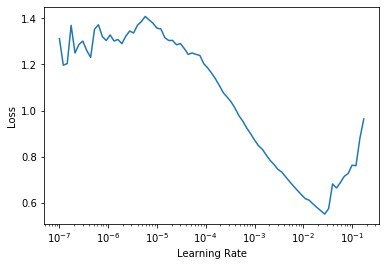

In [18]:
learn.lr_find()

In [19]:
learn.fit_one_cycle(15, 1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,1.490497,0.806062,0.437500,00:03
1,1.510393,0.742750,0.250000,00:02
2,1.228777,0.717105,0.312500,00:02
3,1.140013,0.597612,0.312500,00:02
4,1.013302,0.477637,0.312500,00:03
5,0.883596,0.375683,0.187500,00:02
6,0.763868,0.284726,0.125000,00:02
7,0.670412,0.228967,0.062500,00:02
8,0.588481,0.217902,0.062500,00:03
9,0.558242,0.208517,0.062500,00:03


In [20]:
learn.fit_one_cycle(5, 3e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.244100,0.237770,0.062500,00:03
1,0.203160,0.240878,0.062500,00:03
2,0.172601,0.243996,0.062500,00:02
3,0.162092,0.248067,0.062500,00:03
4,0.162223,0.226731,0.062500,00:02


In [21]:
learn.save('signaling_stage_1')

Path('images/models/signaling_stage_1.pth')

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

In [23]:
losses,idxs = interp.top_losses()

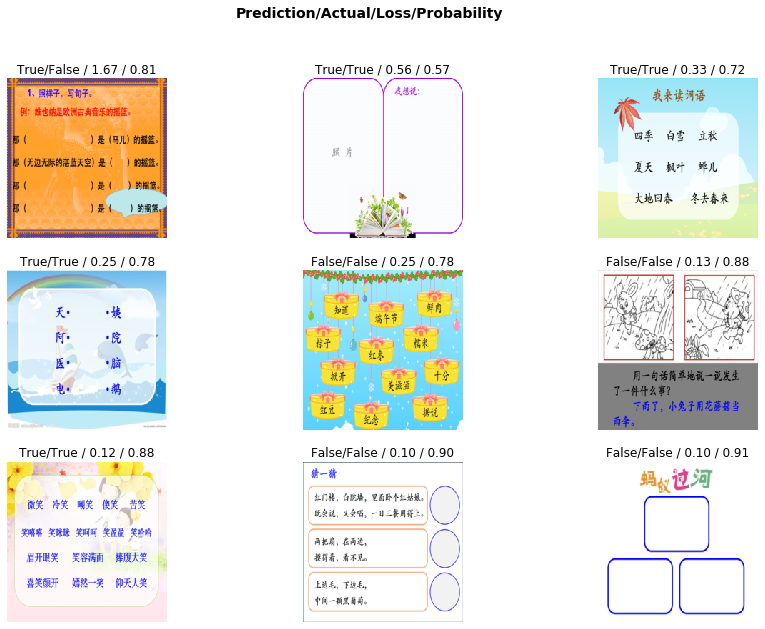

In [24]:
interp.plot_top_losses(9, figsize=(15,10))

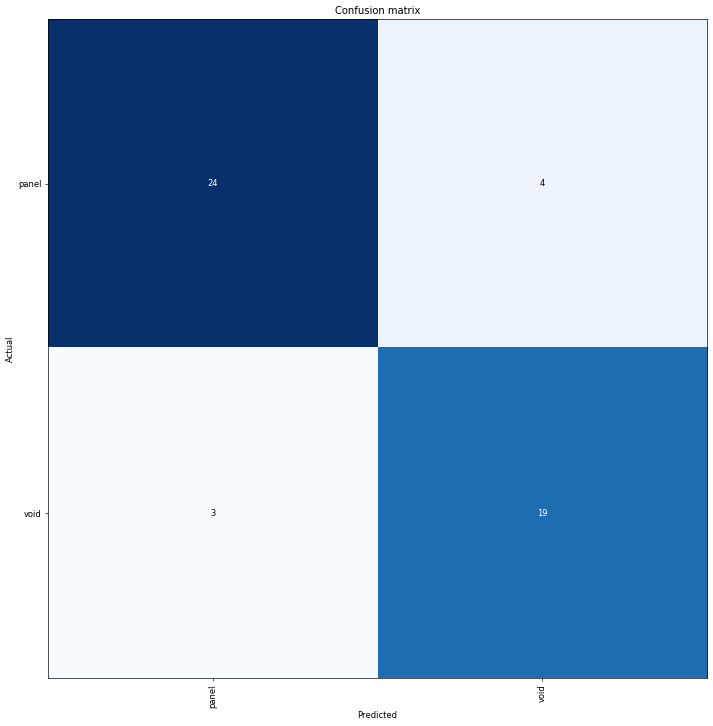

In [27]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# unfreeze

In [26]:
learn.load('signaling_stage_1')

In [27]:
learn.unfreeze()

SuggestedLRs(lr_min=6.918309954926372e-05, lr_steep=1.3182567499825382e-06)

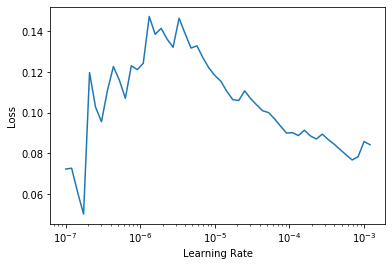

In [28]:
learn.lr_find()

In [27]:
learn.fit_one_cycle(3, lr_max=slice(1e-7, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.190079,0.438881,0.220000,00:04
1,0.161364,0.457264,0.220000,00:03
2,0.170040,0.440845,0.240000,00:03


In [22]:
learn.fit_one_cycle(3, lr_max=slice(1e-7, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.229798,0.538811,0.220000,00:03
1,0.214498,0.550595,0.240000,00:03
2,0.223662,0.548992,0.240000,00:03


In [30]:
learn.fit_one_cycle(3, lr_max=slice(1e-7, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.060405,0.199236,0.062500,00:03
1,0.136443,0.203689,0.062500,00:02
2,0.116939,0.203735,0.062500,00:02


In [31]:
interp = ClassificationInterpretation.from_learner(learn)

In [32]:
losses,idxs = interp.top_losses()

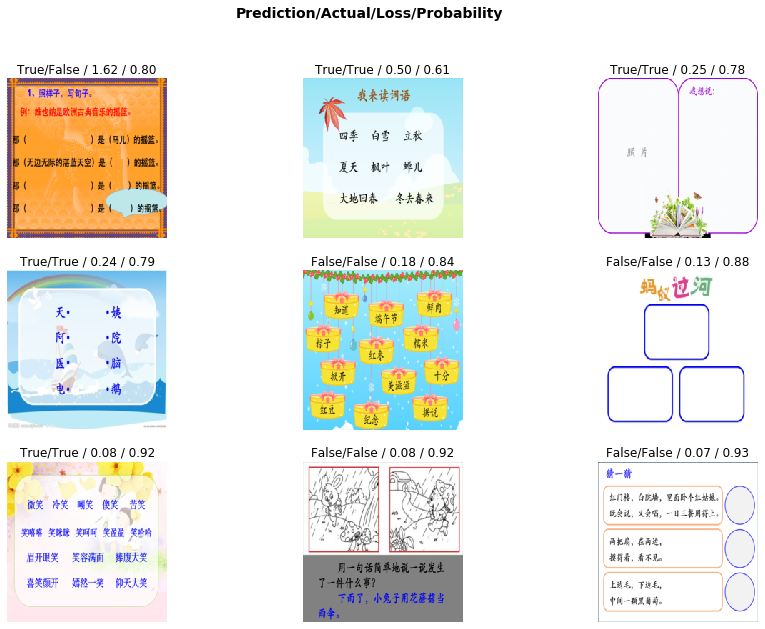

In [33]:
interp.plot_top_losses(9, figsize=(15,10))

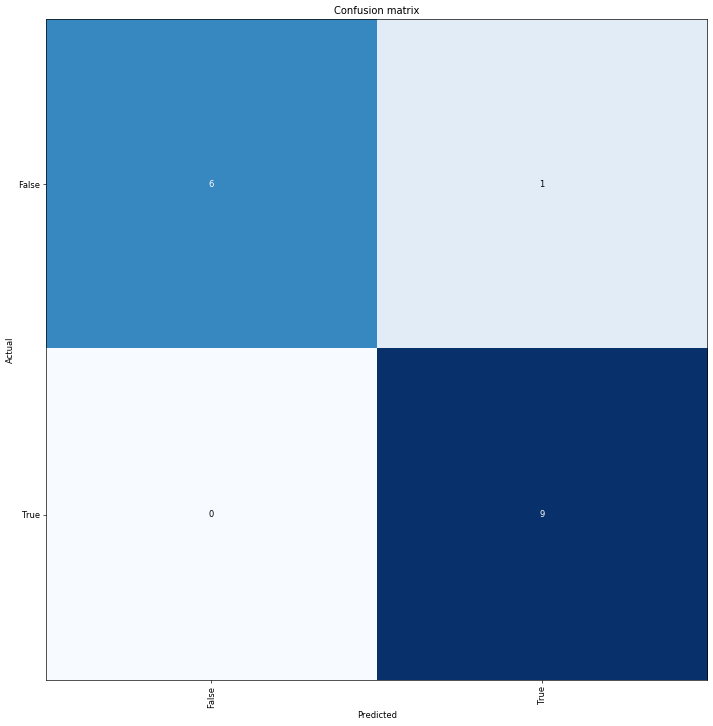

In [34]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [35]:
learn.save('signaling_stage_2')

Path('images/models/signaling_stage_2.pth')